## Pre analysis with 12000 samples

The augmentaion technique used in this model are:-
* SynonymAug
* WordEmbeddingAug with 'substitute' method

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data
df = pd.read_csv('/content/drive/MyDrive/seq2seq/data.csv')

In [3]:
df[df.english_text.str.contains('how are you')]

,corrupted_text,english_text
20,Hi ranger how r ü\n,"Hi, Ranger, how are you?\n"
299,"HELLOGORGEOUS, HOWS U? MY FONE WAS ON CHARGE L...","Hello Gorgeous, how are you? My phone was on c..."
507,Hello h r u\n,"Hello, how are you?\n"
513,I'm gonna bug u.Irritate u.Can?Wat show u watc...,I'm going to bug you. Irritate you. Ok? What s...
531,Hi niny how r ü.care to intro pls...\n,"Hi Niny, how are you? Care to introduce please?\n"
848,"Konichiwa, how r u? wat r u doing?\n","Good afternoon, how are you? What are you doin..."
1234,"Sez, hows u & de arab boy? Hope u r all good g...","Sez, how are you and the Arab boy? Hope you ar..."
1433,..... Ya lor raining is boring..... What show ...,"Yes, raining is boring. What show are you watc..."
1451,Hey yijue how are u getting there later.... We...,"Hey Yijue, how are you getting there later? We..."
1493,Damn lame...Like sayin i can't talk.Sheesh.Wat...,Damn lame. It's like saying I can't talk. What...


In [4]:
# reading the data
data = pd.read_csv('/content/drive/MyDrive/seq2seq/data_score.csv')

In [5]:
data.head(2)

,corrupted_text,english_text,english_inp,english_out,predicted_sentences,bleu_score
0,congratulations estudy hard,congratulations study hard,<start> congratulations study hard,congratulations study hard <end>,congratulations study hard,1.000000
1,a m not is working whath time is junmei after ...,i am not working what time is junmei after wor...,<start> i am not working what time is junmei a...,i am not working what time is junmei after wor...,i am going to orchard now already i am reachin...,0.358313


In [6]:
data.shape

(12000, 6)

## Performing EDA again

In [7]:
data.sort_values('bleu_score', inplace=True)

In [8]:
# data = data.loc[data.bleu_score < 1]

In [9]:
data['english_text_len']  = data.english_text.apply(lambda x: len(x.split()))
data['predicted_sen_len'] = data.predicted_sentences.apply(lambda x: len(x.split()))

In [10]:
data.drop(['english_inp', 'english_out'], axis=1, inplace=True)

In [11]:
sorted_bleu_score0 = data.bleu_score.values

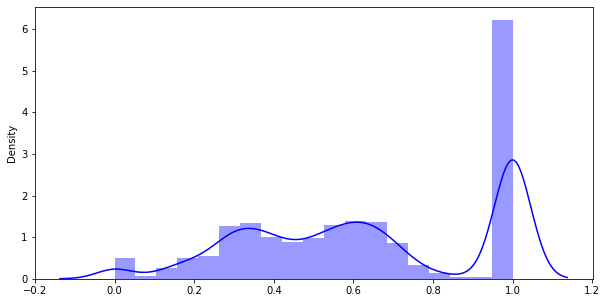

In [12]:
fig = plt.figure(figsize=(10,5))
sns.distplot(sorted_bleu_score0, color='blue')
plt.show()

In [13]:
print('33rd percentile value',np.percentile(sorted_bleu_score0, 33))
print('66th percentile value',np.percentile(sorted_bleu_score0, 66))

33rd percentile value 0.4671379777282001
66th percentile value 0.7825422900366437


In [14]:
for i in range(0,101,5):
    print(i,'th percentile value',np.percentile(sorted_bleu_score0, i))

0 th percentile value 0.0
5 th percentile value 0.1751489536280261
10 th percentile value 0.2663591028349685
15 th percentile value 0.3043741863775328
20 th percentile value 0.3448195623085273
25 th percentile value 0.3850322886878713
30 th percentile value 0.43472087194499137
35 th percentile value 0.4945941952561961
40 th percentile value 0.5408536609893481
45 th percentile value 0.5773502691896257
50 th percentile value 0.6143868746168435
55 th percentile value 0.6431870218238024
60 th percentile value 0.6865890479690392
65 th percentile value 0.7532180557720594
70 th percentile value 1.0
75 th percentile value 1.0
80 th percentile value 1.0
85 th percentile value 1.0
90 th percentile value 1.0
95 th percentile value 1.0
100 th percentile value 1.0


In [15]:
percentile_33 = np.percentile(sorted_bleu_score0, 33)
percentile_66 = np.percentile(sorted_bleu_score0, 66)

In [16]:
data_less_score   = data.loc[data.bleu_score < percentile_33]
data_medium_score = data.loc[(data.bleu_score >= percentile_33) & (data.bleu_score < percentile_66)]
data_best_score   = data.loc[(data.bleu_score >= percentile_66)]

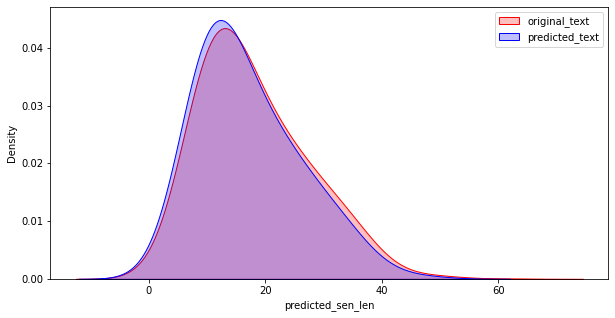

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(data_less_score.english_text_len, hist=False,color='red', label = 'original_text', kde_kws={'bw':0.5, 'shade':True})
sns.distplot(data_less_score.predicted_sen_len, hist=False, color='blue', label='predicted_text', kde_kws={'bw':0.5, 'shade':True})
plt.legend()
plt.show()

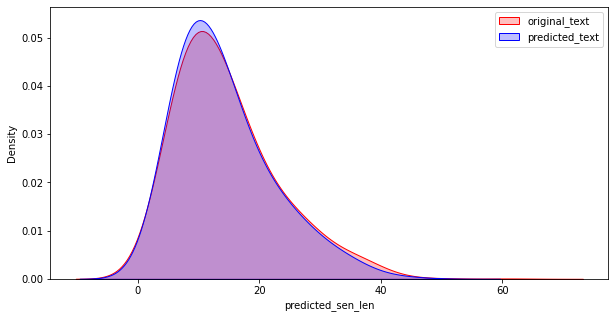

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(data_medium_score.english_text_len, hist=False,color='red', label = 'original_text', kde_kws={'bw':0.5, 'shade':True})
sns.distplot(data_medium_score.predicted_sen_len, hist=False, color='blue', label='predicted_text', kde_kws={'bw':0.5, 'shade':True})
plt.legend()
plt.show()

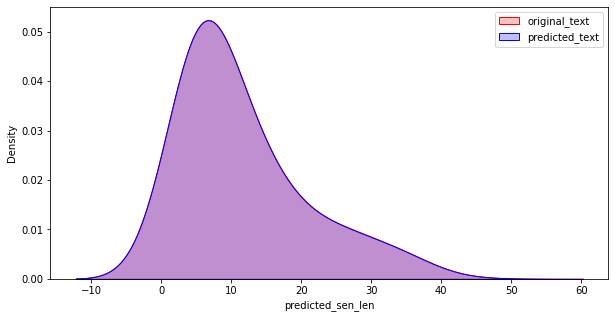

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(data_best_score.english_text_len, hist=False,color='red', label = 'original_text', kde_kws={'bw':0.5, 'shade':True})
sns.distplot(data_best_score.predicted_sen_len, hist=False, color='blue', label='predicted_text', kde_kws={'bw':0.5, 'shade':True})
plt.legend()
plt.show()

In [20]:
data[data.english_text.str.contains('know if it is hard')]

,corrupted_text,english_text,predicted_sentences,bleu_score,english_text_len,predicted_sen_len
7324,haha i don th know if it is har bue i guess i ...,haha i do not know if it is hard but i guess i...,haha i do not mind if you join you not you are...,0.108452,24,25
2320,haha i don t know if it live unvoiced only 1 g...,haha i do not know if it is hard but i guess i...,haha i do not mind if you join you not you thi...,0.117129,24,24
6103,haha i don t know if it is har bud i gues i m ...,haha i do not know if it is hard but i guess i...,haha i do not mind if you join you not you thi...,0.117129,24,24
3429,haha i imus t know if it current hard but i gu...,haha i do not know if it is hard but i guess i...,haha i do not mind if you join you not you thi...,0.117376,24,23
4579,haha i don t know if it is hart but mi guess j...,haha i do not know if it is hard but i guess i...,haha i do not mind if you join you not you thi...,0.117415,24,22
10463,eh haha i dunno if its hard bt i guess i am in...,haha i do not know if it is hard but i guess i...,hi xin i am missing you hope you are having a ...,0.235226,24,19


Picking the random sentence above just to make comparision between corrupted_text, english_text and predicted_sentence, I just made an assumption that the augmentation technique that I applied which was wordEmbeddingAug (using substitute) and synonymAug was not matching with the actual text. So In the below model the augmentation technique are applied only at the character level and we will compare the results later.

<br><br>

## Post model ananlysis with 12000 samples

In this the data augmentation is applied only at the character level. As mentioned above there are only 12000 samples used. The augmentation technique used are :-
* KeyboardAug
* OcrAug
* RandomCharAug with 'swap' action


In [21]:
# reading the data
data1 = pd.read_csv('/content/drive/MyDrive/seq2seq/data_score_post_analysis0.csv')

In [22]:
data1.head(2)

,corrupted_text,english_text,english_inp,english_out,predicted_sentences,bleu_score
0,why soem things are not thta obvious on the us...,why some things are not that obvious on the su...,<start> why some things are not that obvious o...,why some things are not that obvious on the su...,why what things are you spending and have not,0.434437
1,hey jiagin can you bribg 10 bucls 6omogrow it ...,hey jiayin can you bring 10 bucks tomorrow it ...,<start> hey jiayin can you bring 10 bucks tomo...,hey jiayin can you bring 10 bucks tomorrow it ...,hey jiayin can you bring 10 bucks tomorrow it ...,1.000000


In [23]:
data1.shape

(12000, 6)

## Performing EDA again

In [24]:
data1.sort_values('bleu_score', inplace=True)

In [25]:
# data = data.loc[data.bleu_score < 1]

In [26]:
data1['english_text_len']  = data1.english_text.apply(lambda x: len(x.split()))
data1['predicted_sen_len'] = data1.predicted_sentences.apply(lambda x: len(x.split()))

In [27]:
data1.drop(['english_inp', 'english_out'], axis=1, inplace=True)

In [28]:
sorted_bleu_score1 = data1.bleu_score.values

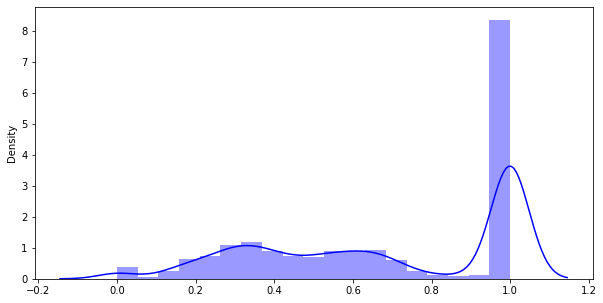

In [29]:
fig = plt.figure(figsize=(10,5))
sns.distplot(sorted_bleu_score1, color='blue')
plt.show()

In [30]:
print('33rd percentile value',np.percentile(sorted_bleu_score1, 33))
print('66th percentile value',np.percentile(sorted_bleu_score1, 66))

33rd percentile value 0.5013840477862073
66th percentile value 1.0


In [31]:
for i in range(0,101,5):
    print(i,'th percentile value',np.percentile(sorted_bleu_score1, i))

0 th percentile value 0.0
5 th percentile value 0.1772984226469502
10 th percentile value 0.256707056599418
15 th percentile value 0.30209767447196134
20 th percentile value 0.34572078464194106
25 th percentile value 0.3882726777522232
30 th percentile value 0.4548019047027907
35 th percentile value 0.5206571060403834
40 th percentile value 0.5799150677091911
45 th percentile value 0.638132032468131
50 th percentile value 0.6865890479690392
55 th percentile value 0.8668778997501817
60 th percentile value 1.0
65 th percentile value 1.0
70 th percentile value 1.0
75 th percentile value 1.0
80 th percentile value 1.0
85 th percentile value 1.0
90 th percentile value 1.0
95 th percentile value 1.0
100 th percentile value 1.0


In [32]:
percentile_33 = np.percentile(sorted_bleu_score1, 33)
percentile_66 = np.percentile(sorted_bleu_score1, 66)

In [33]:
data_less_score   = data1.loc[data1.bleu_score < percentile_33]
data_medium_score = data1.loc[(data1.bleu_score >= percentile_33) & (data.bleu_score < percentile_66)]
data_best_score   = data1.loc[(data1.bleu_score >= percentile_66)]

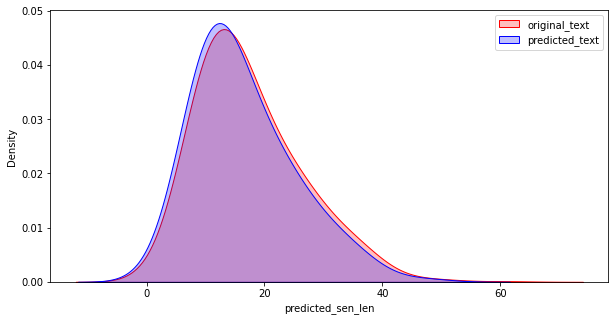

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(data_less_score.english_text_len, hist=False,color='red', label = 'original_text', kde_kws={'bw':0.5, 'shade':True})
sns.distplot(data_less_score.predicted_sen_len, hist=False, color='blue', label='predicted_text', kde_kws={'bw':0.5, 'shade':True})
plt.legend()
plt.show()

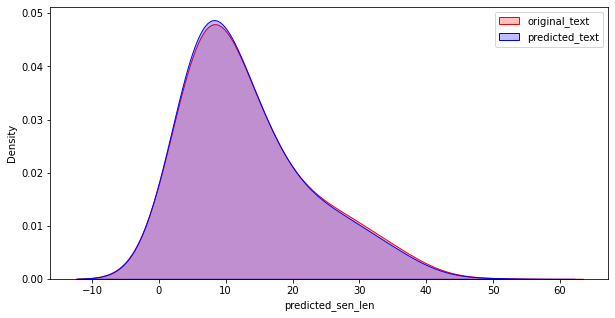

In [35]:
plt.figure(figsize=(10,5))
sns.distplot(data_medium_score.english_text_len, hist=False,color='red', label = 'original_text', kde_kws={'bw':0.5, 'shade':True})
sns.distplot(data_medium_score.predicted_sen_len, hist=False, color='blue', label='predicted_text', kde_kws={'bw':0.5, 'shade':True})
plt.legend()
plt.show()

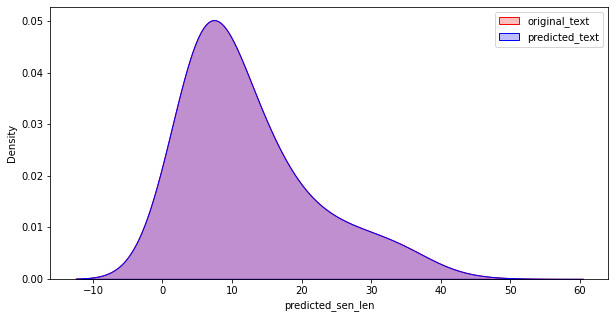

In [36]:
plt.figure(figsize=(10,5))
sns.distplot(data_best_score.english_text_len, hist=False,color='red', label = 'original_text', kde_kws={'bw':0.5, 'shade':True})
sns.distplot(data_best_score.predicted_sen_len, hist=False, color='blue', label='predicted_text', kde_kws={'bw':0.5, 'shade':True})
plt.legend()
plt.show()

<br><br>

## Post model ananlysis with 16000 samples

This model is same as the above model with the difference that the number of sample points are increased and on more character augmentaiono technique is used.
In this the data augmentation is applied only at the character level. As mentioned above there are only 16000 samples used. The augmentation technique used are :-
* KeyboardAug
* OcrAug
* RandomCharAug with 'swap' action
* Spelling Aug


In [37]:
# reading the data
data2 = pd.read_csv('/content/drive/MyDrive/seq2seq/data_score_post_analysis1.csv')

In [38]:
data2.head(2)

,corrupted_text,english_text,english_inp,english_out,predicted_sentences,bleu_score
0,yaep you reaching we oredrde some durian pastr...,yeap you reaching we ordered some durian pastr...,<start> yeap you reaching we ordered some duri...,yeap you reaching we ordered some durian pastr...,have you finished any exercise yet what is lik...,0.547518
1,never mind this one it s for aostkalia but i w...,never mind this one it is for australia but i ...,<start> never mind this one it is for australi...,never mind this one it is for australia but i ...,never mind this one it is for australia but i ...,1.000000


In [39]:
data2.shape

(16000, 6)

## Performing EDA again

In [40]:
data2.sort_values('bleu_score', inplace=True)

In [41]:
# data = data.loc[data.bleu_score < 1]

In [42]:
data2['english_text_len']  = data2.english_text.apply(lambda x: len(x.split()))
data2['predicted_sen_len'] = data2.predicted_sentences.apply(lambda x: len(x.split()))

In [43]:
data2.drop(['english_inp', 'english_out'], axis=1, inplace=True)

In [44]:
sorted_bleu_score2 = data2.bleu_score.values

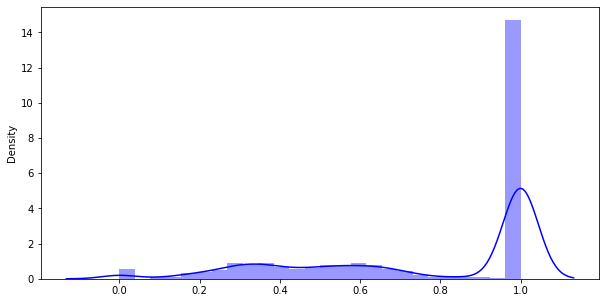

In [45]:
fig = plt.figure(figsize=(10,5))
sns.distplot(sorted_bleu_score2, color='blue')
plt.show()

In [46]:
print('33rd percentile value',np.percentile(sorted_bleu_score2, 33))
print('66th percentile value',np.percentile(sorted_bleu_score2, 66))

33rd percentile value 0.6059285518620335
66th percentile value 1.0


In [47]:
for i in range(0,101,5):
    print(i,'th percentile value',np.percentile(sorted_bleu_score2, i))

0 th percentile value 0.0
5 th percentile value 0.21423607640649572
10 th percentile value 0.2978667216936147
15 th percentile value 0.3549111531510288
20 th percentile value 0.4160239075602121
25 th percentile value 0.5013840477862073
30 th percentile value 0.5631101643283382
35 th percentile value 0.6337834876616586
40 th percentile value 0.7071067811865476
45 th percentile value 1.0
50 th percentile value 1.0
55 th percentile value 1.0
60 th percentile value 1.0
65 th percentile value 1.0
70 th percentile value 1.0
75 th percentile value 1.0
80 th percentile value 1.0
85 th percentile value 1.0
90 th percentile value 1.0
95 th percentile value 1.0
100 th percentile value 1.0


In [48]:
percentile_33 = np.percentile(sorted_bleu_score2, 33)
percentile_66 = np.percentile(sorted_bleu_score2, 66)

In [49]:
data_less_score   = data2.loc[data2.bleu_score < percentile_33]
data_medium_score = data2.loc[(data2.bleu_score >= percentile_33) & (data.bleu_score < percentile_66)]
data_best_score   = data2.loc[(data2.bleu_score >= percentile_66)]

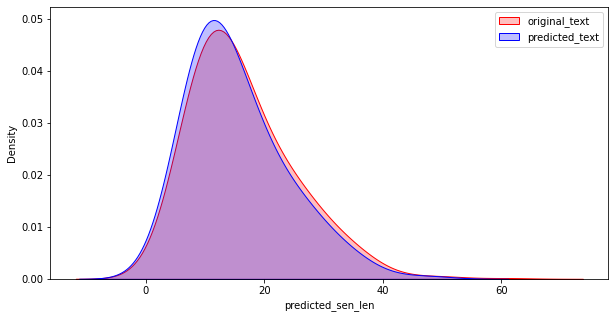

In [50]:
plt.figure(figsize=(10,5))
sns.distplot(data_less_score.english_text_len, hist=False,color='red', label = 'original_text', kde_kws={'bw':0.5, 'shade':True})
sns.distplot(data_less_score.predicted_sen_len, hist=False, color='blue', label='predicted_text', kde_kws={'bw':0.5, 'shade':True})
plt.legend()
plt.show()

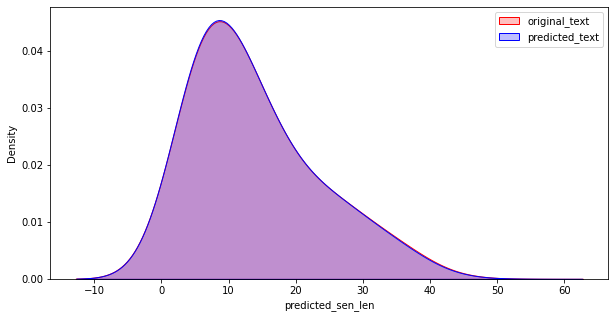

In [51]:
plt.figure(figsize=(10,5))
sns.distplot(data_medium_score.english_text_len, hist=False,color='red', label = 'original_text', kde_kws={'bw':0.5, 'shade':True})
sns.distplot(data_medium_score.predicted_sen_len, hist=False, color='blue', label='predicted_text', kde_kws={'bw':0.5, 'shade':True})
plt.legend()
plt.show()

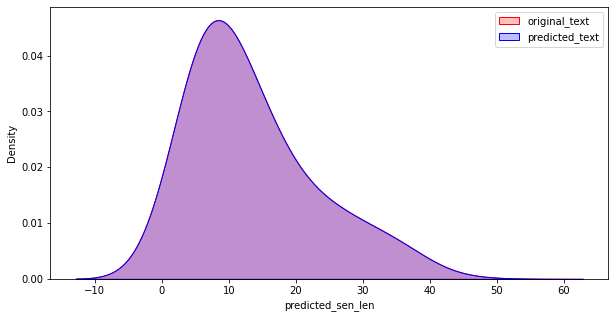

In [52]:
plt.figure(figsize=(10,5))
sns.distplot(data_best_score.english_text_len, hist=False,color='red', label = 'original_text', kde_kws={'bw':0.5, 'shade':True})
sns.distplot(data_best_score.predicted_sen_len, hist=False, color='blue', label='predicted_text', kde_kws={'bw':0.5, 'shade':True})
plt.legend()
plt.show()

<br><br><br><br>

## Comparing models 

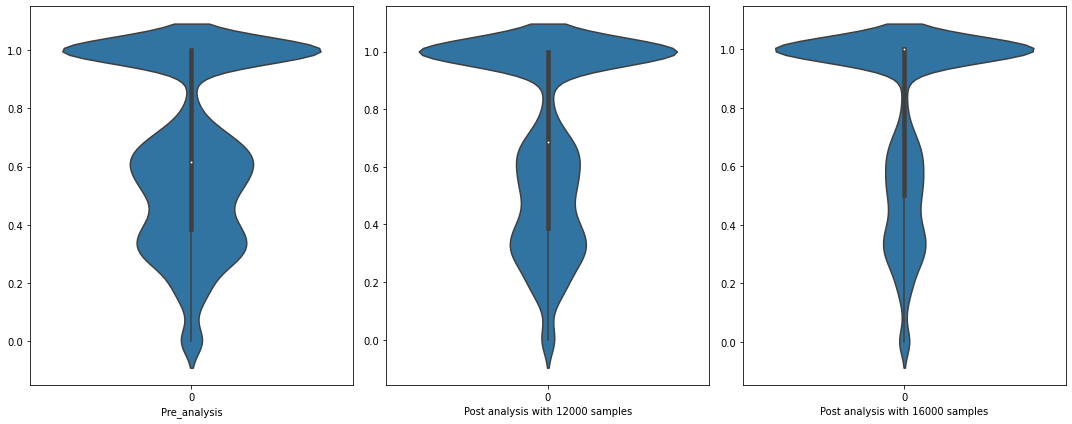

In [53]:
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 3)

ax = fig.add_subplot(gs[0, 0])

sns.violinplot(data=sorted_bleu_score0)
ax.set_xlabel("Pre_analysis")

ax = fig.add_subplot(gs[0, 1])
sns.violinplot(data=sorted_bleu_score1)
ax.set_xlabel("Post analysis with 12000 samples")

ax = fig.add_subplot(gs[0, 2])
sns.violinplot(data=sorted_bleu_score2)
ax.set_xlabel("Post analysis with 16000 samples")

fig.tight_layout()
plt.show()

Observation:-
* for 1st graph :- Pre analysis plot we can see that there are a large number of values in range 0 - 0.8. The values for bleu_score 1 are quite large.
* for 2nd graph :- Post analysis with 12000 samples  we can see that there are few values in range 0 - 0.8 and the values with 1 bleu_score seems to be high. We can see the mean of the violin plot is shifted towards 1 as compared to the Pre_analysis graph.
* for 3rd graph:- Post analysis with 16000 samples we can see that there are few values in range 0-0.8 as campared to second graph and the mean is shifted upwards.

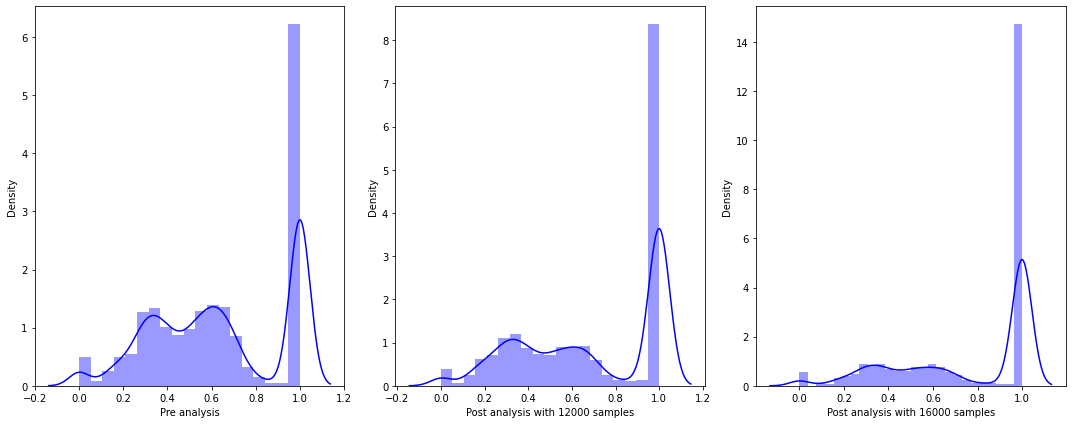

In [54]:
fig = plt.figure(figsize=(15,6))
gs = fig.add_gridspec(1, 3)

ax = fig.add_subplot(gs[0, 0])

sns.distplot(sorted_bleu_score0, color='blue')
ax.set_xlabel("Pre analysis")

ax = fig.add_subplot(gs[0, 1])
sns.distplot(sorted_bleu_score1, color='blue')
ax.set_xlabel("Post analysis with 12000 samples")

ax = fig.add_subplot(gs[0, 2])
sns.distplot(sorted_bleu_score2, color='blue')
ax.set_xlabel("Post analysis with 16000 samples")

fig.tight_layout()
plt.show()


Observation:-
* for 1st graph we can see that the sentences wit bleu_score can be seen in range 0-0.8 and values with 1 bleu_score are also high.
* for 2nd graph the values with bleu_score in range 0-0.8 are very few and values with 1 bleu_score are quite high as compared to 1st graph (the bar height is same but the scale is different for 2nd graph)
* for 3rd graph the values with bleu_score in range 0-0.8 are very less as compared to 2nd graph but the values with bleu_score 1 are high in comparision to 2nd graph
<br>
Note: Please note that all the graph above may look the same but the scale is changing for the three graphs.

In [55]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Percentile", "Pre analysis", "Post analysis with 12000 samples", "Post analysis with 16000 samples"])
  
# Add rows
for i in range(0,101,1):
    myTable.add_row([str(i)+'th percentile', np.percentile(sorted_bleu_score0, i), np.percentile(sorted_bleu_score1, i), np.percentile(sorted_bleu_score2, i)])
  
print(myTable)

+------------------+---------------------+----------------------------------+----------------------------------+
|    Percentile    |     Pre analysis    | Post analysis with 12000 samples | Post analysis with 16000 samples |
+------------------+---------------------+----------------------------------+----------------------------------+
|  0th percentile  |         0.0         |               0.0                |               0.0                |
|  1th percentile  |         0.0         |               0.0                |               0.0                |
|  2th percentile  |         0.0         |               0.0                |               0.0                |
|  3th percentile  | 0.10846651837922923 |       0.13264759167412227        |        0.1589495943246725        |
|  4th percentile  |  0.1513851459876605 |       0.16073034972341446        |        0.190188683947748         |
|  5th percentile  |  0.1751489536280261 |        0.1772984226469502        |       0.2142360764

Observation:-
* For 1st model (Pre analysis one) 32% of the values are with 1 bleu_score and 36% of the values are less than 0.5 bleu_score.
* For 2nd model (Post analysis with 12000 samples) about 47% of the values are with 1 bleu_score and 33% of the values are less than 0.5 bleu_score.
* For 3rd model (Post analysis with 16000 samples) about 56% of the values are with 1 bleu_score and 25% of the values are less than 0.5 bleu_score.


In [56]:
print('percentage of values for Pre analysis model with bleu_score greater than 0.5 :', data[data.bleu_score >= 0.5].shape[0] / data.shape[0])
print('percentage of values for Post_analysis_with_12000_samples model with bleu_score greater than 0.5 :', data1[data1.bleu_score >= 0.5].shape[0] / data1.shape[0])
print('percentage of values for Post analysis with 16000 samples model with bleu_score greater than 0.5 :', data2[data2.bleu_score >= 0.5].shape[0] / data2.shape[0])

print('-' * 120)

print('percentage of values for Pre analysis model with bleu_score 1 :', data[data.bleu_score == 1].shape[0] / data.shape[0])
print('percentage of values for Post_analysis_with_12000_samples model with bleu_score 1 :', data1[data1.bleu_score == 1].shape[0] / data1.shape[0])
print('percentage of values for Post analysis with 16000 samples model with bleu_score 1 :', data2[data2.bleu_score == 1].shape[0] / data2.shape[0])

percentage of values for Pre analysis model with bleu_score greater than 0.5 : 0.6458333333333334
percentage of values for Post_analysis_with_12000_samples model with bleu_score greater than 0.5 : 0.67225
percentage of values for Post analysis with 16000 samples model with bleu_score greater than 0.5 : 0.7520625
------------------------------------------------------------------------------------------------------------------------
percentage of values for Pre analysis model with bleu_score 1 : 0.32608333333333334
percentage of values for Post_analysis_with_12000_samples model with bleu_score 1 : 0.4379166666666667
percentage of values for Post analysis with 16000 samples model with bleu_score 1 : 0.565125


Observation:-
There is a very less difference seen between 2nd and 3rd model with bleu_score 1 but when we compare the model 1st and 2nd we can see that applying the augmentation technique at character level helped to increase the sentences with bleu_score 1 keeping in mind that both the models contains the same number of data points.

Conclusion:-
* On comparing the 1st and 2nd model, the character level augmentaion technique seems to work better than the word level augmentaion technique.
* On comparing the 2nd and 3rd model, when the number of  samples were increased for the 3rd model the performance of the model improved.